<h1>Assignment4</h1>

Priyanka Raavi

Student ID: 200393260

Email: priyankaravi03@gmail.com

<h4>Problem Statement</h4>
Our problem Statement is, How can I survive on mushrooms by identifying whether it is poisonous or edible, which means which factors should be considered to identify whether a mushroom is edible or poisonous. 

Based on the problem statement, we have to classify because we have only to separate, which are poisonous or edible and also, our data set is large and has the labeled data.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
cd /content/gdrive

/content/gdrive


In [3]:
cd My\ Drive

/content/gdrive/My Drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns
# Warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
%matplotlib inline
%precision 3
plt.style.use('ggplot')
sns.set_style('white')

In [0]:
mushrooms = pd.read_csv('mushrooms.csv') 

<h3>Part A: Determine a proper model</h3>

To define our problem statement, we need a perfect model. To know which model suits best with the data, I would like to perform multiple machine learning algorithm to do classification on the data and see which algorithm gives good accuracy will select that model to continue our problem statement.

The machine learning algorithms are of three types[1]:

    1.Supervised Learning
    2.Unsupervised Learning
    3.Reinforcement Learning


<h4>1. Supervised Learning:</h4>

   This algorithm has a target variable(dependent) and labeled data(independent). We will split the data into train data and test data. Using this train data, we will use functions that generate the desired outputs, which provides excellent accuracy. This process will continue until we get the desired accuracy on the training data.

<h4>2. Unsupervised Learning:</h4>
  
   This algorithm doesn't have any separation of target and predicate variables. In this algorithm, we will draw inferences from the input data without any labeled data. It is mostly a clustering analysis.
   
<h4>Reinforcement Learning</h4>

This algorithm is more used to make particular business decisions. In this algorithm, we will get the results based on past experiences. This algorithm is more exposed to the environment and learns itself by trail and error.

I'm going to apply supervised machine learning algorithms on our data set to test which algorithm is best suited for the data. I have taken the supervised learning algorithms because, our data set is more of labeled data, and based on our problem statement, we have a target variable(class). So, In my opinion, supervised learning algorithms are best suited. Here, I would like to perform five supervised learning algorithms:
1. Logistic Regression
2. Support Vector Machines
3. K-nearest Neighbours(K-NN)
4. Naive-Bayes Classifier
5. Decision Tree Classifier

I will explain each algorithm in detail while performing it.

Before going to perform the algorithms, we have to preprocess the data because all the variables in the data set are categorical. So, Let's preprocess the data.

<h4> Data Preprocessing</h4>

I'm converting the categorical variables(23) into dummy variables up to 95 variables and then reduce the shape using PCA(Principal Component Analysis) with two variables.

First, Let's split the data into predictors and responses.

Predicators are the independent variables(all the variables except class) whereas, the response is the class variable(target variable).


In [7]:
pred=mushrooms.drop('class',axis=1) #Predictors
resp=mushrooms['class'] #Response
pred.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Converting or Encoding the Categorical data:

In [0]:
from sklearn.preprocessing import LabelEncoder
Encoder_pred = LabelEncoder() 
for col in pred.columns:
    pred[col] = Encoder_pred.fit_transform(pred[col])
Encoder_resp=LabelEncoder()
resp = Encoder_pred.fit_transform(resp)


In [9]:
pred.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [10]:
resp   # here 1 means poisonous, 0 means edible

array([1, 0, 0, ..., 0, 1, 0])

Now, Let's create the dummy variables using the pandas library in such a way that, based on the number of unique values. It creates no. of variables based on no. of unique values in each variable. For example, cap-shape has 5 values, so it created 5 variables. 0 and 1 represent true or false values.

In [11]:
pred=pd.get_dummies(pred,columns=pred.columns,drop_first=True)
pred.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,cap-color_3,cap-color_4,cap-color_5,cap-color_6,cap-color_7,cap-color_8,cap-color_9,bruises_1,odor_1,odor_2,odor_3,odor_4,odor_5,odor_6,odor_7,odor_8,gill-attachment_1,gill-spacing_1,gill-size_1,gill-color_1,gill-color_2,gill-color_3,gill-color_4,gill-color_5,gill-color_6,gill-color_7,gill-color_8,gill-color_9,gill-color_10,gill-color_11,...,stalk-color-above-ring_5,stalk-color-above-ring_6,stalk-color-above-ring_7,stalk-color-above-ring_8,stalk-color-below-ring_1,stalk-color-below-ring_2,stalk-color-below-ring_3,stalk-color-below-ring_4,stalk-color-below-ring_5,stalk-color-below-ring_6,stalk-color-below-ring_7,stalk-color-below-ring_8,veil-color_1,veil-color_2,veil-color_3,ring-number_1,ring-number_2,ring-type_1,ring-type_2,ring-type_3,ring-type_4,spore-print-color_1,spore-print-color_2,spore-print-color_3,spore-print-color_4,spore-print-color_5,spore-print-color_6,spore-print-color_7,spore-print-color_8,population_1,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Now, Lets split the dataset as train set and test set.

In [0]:
from sklearn.model_selection import train_test_split
pred_train, pred_test, resp_train, resp_test = train_test_split(pred, resp, test_size=0.1, random_state=0)

We are scaling the pred data using StandardScaler library[2]. This library assumes that, In each variable, the data is distributed normally, and then it scales the distribution.

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
pred_train = sc.fit_transform(pred_train)
pred_test = sc.transform(pred_test)

After scaling the data, we will use PCA to reduce the variables with no. of components 2. Here we are using PCA because PCA could "transform the set of observations of possibly correlated variables to set of values of linearly uncorrelated variables"[3]. 

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pred_train = pca.fit_transform(pred_train)
pred_test = pca.transform(pred_test)

Let's see how the trained data set look like:

Now, we will introduce each supervised learning algorithm we thought to test and see the result.

In [0]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))

<h4>Testing the Models</h4>

1. Logistic Regression:

      This algorithm is used when the target variable is categorical[4] or when the target variable is binary. Same as all regression algorithms, this algorithm is also used for prediction analysis. It uses a black-box function called softmax, which describes the relationship between the target variable with the other independent variables[5].

In [19]:
#let's fit the logistic regression to the train set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(pred_train,resp_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
print_score(classifier,pred_train,resp_train,pred_test,resp_test,train=True)
print_score(classifier,pred_train,resp_train,pred_test,resp_test,train=False)

Training results:

Accuracy Score: 0.9056

Test results:

Accuracy Score: 0.9028

Average Accuracy:	0.9056



2. Support Vector Machine(SVM):

     This kind of algorithm is used to decide by creating a line or a hyperplane that separates the data into different classes and make sure the difference between the classes is as vast as possible[6]. It can solve linear and non-linear problems.

In [21]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42)

classifier.fit(pred_train,resp_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [22]:
print_score(classifier,pred_train,resp_train,pred_test,resp_test,train=True)
print_score(classifier,pred_train,resp_train,pred_test,resp_test,train=False)

Training results:

Accuracy Score: 0.9279

Test results:

Accuracy Score: 0.9262

Average Accuracy:	0.9265



3.K-Nearest Neighbour(K-NN):

       This algorithm works based on minimum distance from the query instance to the training samples to determine the k- nearest neighbors. After we gather k nearest neighbors, we take a simple majority of these k-nearest neighbors to be the prediction of the query instance.

In [23]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(pred_train,resp_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
print_score(classifier,pred_train,resp_train,pred_test,resp_test,train=True)
print_score(classifier,pred_train,resp_train,pred_test,resp_test,train=False)

Training results:

Accuracy Score: 0.9427

Test results:

Accuracy Score: 0.9274

Average Accuracy:	0.9291



4.Naive-Bayes Classifier:

   It is a dominant and straightforward algorithm based on Bayes theorem. It is the best-suited algorithm for textual data analysis classification with millions of records. This algorithm makes predictions on the membership probabilities of each class[7]. The class, which has the highest chance, is mostly used.

In [25]:
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(pred_train,resp_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
print_score(classifier,pred_train,resp_train,pred_test,resp_test,train=True)
print_score(classifier,pred_train,resp_train,pred_test,resp_test,train=False)

Training results:

Accuracy Score: 0.8980

Test results:

Accuracy Score: 0.8967

Average Accuracy:	0.8977



5. Decision Tree:

This algorithm is used to create a training set which can be used to predict the target variables by learning decision rules from the train data set.This algorithm is used for both classification and regression as well. In this algorithm, the data is been split, prune and then does the tree selection based on entropy[8].

In [27]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier = DT(criterion='entropy',random_state=42)
classifier.fit(pred_train,resp_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [28]:
print_score(classifier,pred_train,resp_train,pred_test,resp_test,train=True)
print_score(classifier,pred_train,resp_train,pred_test,resp_test,train=False)

Training results:

Accuracy Score: 1.0000

Test results:

Accuracy Score: 0.9065

Average Accuracy:	0.9004



Based on the results of testing all the supervised learning models, I got to know that, K-NN models is best suited for this data set.

<h3> Part B&C: Apply the Algorithm & Visualization</h3>

K-Nearest Neighbor(K-NN):

K-NN is the most used and simple supervised learning algorithm. It works based on minimum distance from the query instance to the training samples to determine the k- nearest neighbors rather than making assumptions on the data, the prediction is retrieved from the data itself. It doesn't need much training phase because it uses the train data during the testing phase. This algorithm is based on feature similarity. The pseudo code of the algorithm as below:

1. Load the data
2. Based on the no. of neighbors we set, we will initialize K.
3. For every example in the data,

       i. we will calculate the distance between the data of the current example and the question.
       ii. And then, we will add that distance to the index of the instance to an ordered data.
4. Sort them in ascending order.
5. Pick the K entries which come first from that sorted collection.
6. Get the labels of the first k entries.
7.Return the mode of the K labels

The pre-processing of data to use this model had already done. so, we will just use that data and create a model.

In [29]:
pred.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,cap-color_3,cap-color_4,cap-color_5,cap-color_6,cap-color_7,cap-color_8,cap-color_9,bruises_1,odor_1,odor_2,odor_3,odor_4,odor_5,odor_6,odor_7,odor_8,gill-attachment_1,gill-spacing_1,gill-size_1,gill-color_1,gill-color_2,gill-color_3,gill-color_4,gill-color_5,gill-color_6,gill-color_7,gill-color_8,gill-color_9,gill-color_10,gill-color_11,...,stalk-color-above-ring_5,stalk-color-above-ring_6,stalk-color-above-ring_7,stalk-color-above-ring_8,stalk-color-below-ring_1,stalk-color-below-ring_2,stalk-color-below-ring_3,stalk-color-below-ring_4,stalk-color-below-ring_5,stalk-color-below-ring_6,stalk-color-below-ring_7,stalk-color-below-ring_8,veil-color_1,veil-color_2,veil-color_3,ring-number_1,ring-number_2,ring-type_1,ring-type_2,ring-type_3,ring-type_4,spore-print-color_1,spore-print-color_2,spore-print-color_3,spore-print-color_4,spore-print-color_5,spore-print-color_6,spore-print-color_7,spore-print-color_8,population_1,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [30]:
resp

array([1, 0, 0, ..., 0, 1, 0])

To initialize K, What would be the optimal K value?. Let figure out that.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,200))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in myList[::2]:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, pred_train, resp_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 15


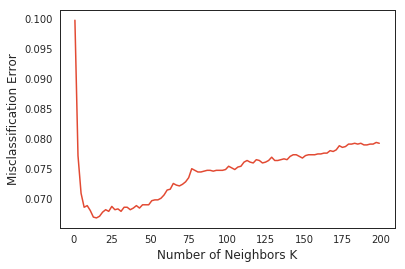

In [33]:
from matplotlib import pyplot as plt
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = myList[::2][MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(myList[::2], MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

Now, lets continue to implement our algorithm to our data set by specifying the no. of neighbors to 15 as it is the optimal no. of neighbors.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier =  KNeighborsClassifier(n_neighbors=15,p=2, metric='minkowski')
classifier.fit(pred_train,resp_train)
resp_pred = classifier.predict(pred_test)
accuracy_score(resp_test,resp_pred)

0.936

Let's see What factors or features to be considered for surviving on mushrooms?

In [45]:
n_features = pred.shape[1]
clf = KNeighborsClassifier()
feature_score = []
# calculating the score to each feature.
for i in range(n_features):
    pred_feature= np.reshape(pred.iloc[:,i:i+1],-1,1)
    scores = cross_val_score(clf, pred_feature, resp)
    feature_score.append(scores.mean())
    print('%40s        %g' % (pred.columns[i], scores.mean()))

                             cap-shape_1        0.518464
                             cap-shape_2        0.528923
                             cap-shape_3        0.563777
                             cap-shape_4        0.517971
                             cap-shape_5        0.482275
                           cap-surface_1        0.517971
                           cap-surface_2        0.515533
                           cap-surface_3        0.505908
                             cap-color_1        0.517971
                             cap-color_2        0.502831
                             cap-color_3        0.494707
                             cap-color_4        0.492747
                             cap-color_5        0.514153
                             cap-color_6        0.517971
                             cap-color_7        0.517971
                             cap-color_8        0.517971
                             cap-color_9        0.551455
                               

These are the most considerable factors to identify which mushrooms are poisonous.

In [36]:
#Sorting the selected ordered collection in an ascending order
imp_features = pd.Series(data = feature_score, index = pred.columns)
imp_features.sort_values(ascending=True, inplace=True)
imp_features[imp_features>0.7]

spore-print-color_1           0.707000
gill-size_1                   0.756319
stalk-surface-below-ring_1    0.766109
stalk-surface-above-ring_1    0.774481
odor_2                        0.783831
dtype: float64

We got to know which top factors to identify whether a mushroom is poisonous or not. Let's see, to survive which mushrooms are edible and which are poisonous. To identify that, let's group the mushrooms that are edible and poisonous.

In [0]:
imp_columns = imp_features[imp_features>0.7].index.values
final_pr= pd.concat([pred,pd.DataFrame(resp,columns=['class'])], axis=1)
grouped = final_pr.groupby('class')

In [38]:
# Edible group of mushrooms
grouped.get_group(0)[imp_columns].sum()

spore-print-color_1            48
gill-size_1                   288
stalk-surface-below-ring_1    144
stalk-surface-above-ring_1    144
odor_2                          0
dtype: int64

In [39]:
# Poisonous group of mushrooms
grouped.get_group(1)[imp_columns].sum()

spore-print-color_1           1584
gill-size_1                   2224
stalk-surface-below-ring_1    2160
stalk-surface-above-ring_1    2228
odor_2                        2160
dtype: int64

So, we got to know that, if the mushrooms indicate these factors, then those are poisonous. So, to survive on mushrooms, we should avoid them. The factors are: stalk surface above or below the ring is silky, the odor is foul, Gill Size is narrow, Spore prints are chocolatey in color.

<h3>Part D: Discussion</h3>

K-NN is mostly used for the classification. As our data is categorical, K-NN is the best-suited algorithm. If we see the results of testing the 5 supervised learning algorithms, K-NN provided better accuracy rate among all. It is best suited for our data set and could predict the data. According to our data, it proved which mushrooms are poisonous or edible.

<h3>Part E: Summary</h3>

TO conclude, The goal of the notebook is to know which is the best-suited algorithm to identify which mushroom is edible and which is poisonous. To achieve that, I have preprocessed the data as most of the data is categorical, I have created the dummy variables and performed PCA. Later, I have tested a few supervised learning algorithms and found the best algorithm(K-NN) that suited for the data. Later, I have implemented the K-NN algorithm by following the pseudo-code of K-NN and got the factors based which we could identify which mushroom is edible and which is poisonous.

No other algorithm could able to predict with more accuracy rate than K-NN to this data set Whereas; Logistic regression would be the second-best option to use on this data set.

<h3> References</h3>
1. Analytics, B. and Codes), C. (2019). Essentials of Machine Learning Algorithms (with Python and R Codes). [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/ [Accessed 24 Aug. 2019].

2.Keen, B. (2019). Feature Scaling with scikit-learn – Ben Alex Keen. [online] Benalexkeen.com. Available at: http://benalexkeen.com/feature-scaling-with-scikit-learn/ [Accessed 24 Aug. 2019].

3.wikipedia, w. (2019). Principal component analysis. [online] En.wikipedia.org. Available at: https://en.wikipedia.org/wiki/Principal_component_analysis [Accessed 24 Aug. 2019].

4.Swaminathan, S. (2019). Logistic Regression — Detailed Overview. [online] Medium. Available at: https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc [Accessed 24 Aug. 2019].

5.Solutions, S. (2019). What is Logistic Regression? - Statistics Solutions. [online] Statistics Solutions. Available at: https://www.statisticssolutions.com/what-is-logistic-regression/ [Accessed 24 Aug. 2019].

6.Pupale, R. (2019). Support Vector Machines(SVM) — An Overview. [online] Medium. Available at: https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989 [Accessed 24 Aug. 2019].

7.Saxena, R. (2019). How the Naive Bayes Classifier works in Machine Learning. [online] Dataaspirant. Available at: https://dataaspirant.com/2017/02/06/naive-bayes-classifier-machine-learning/ [Accessed 24 Aug. 2019].

8.Sehra, C. (2019). Decision Trees Explained Easily. [online] Medium. Available at: https://medium.com/@chiragsehra42/decision-trees-explained-easily-28f23241248 [Accessed 24 Aug. 2019].

9.Harrison, O. (2019). Machine Learning Basics with the K-Nearest Neighbors Algorithm. [online] Medium. Available at: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761 [Accessed 24 Aug. 2019].